In [1]:
import saxtal_functions as sax
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from tqdm import tqdm

In [2]:
filename = 'test_data/test_lattices/000085379250142240070_SFO2_105_0024_patch_aligned_doseweighted_bin_2.mrc'
threshold_method='sd' 
verbose=True
threads=16
sigma=15 
num_sd=3 
x_window_percent=(0, 0.7)
y_window_percent=(0, 0.995)
mask_hotpixels=False
replace_distance_percent=0.05
return_spots=False

In [3]:
image, header = sax.import_mrc(filename)
padded_fft = sax.scipy_fft(image, verbose, 16)
log_diff_spectrum, smoothed_spectrum = sax.generate_diff_spectrum(padded_fft, sigma)

scipy_fft(): FFT performed in 93.22 milliseconds.


In [4]:
diffraction_indices, diffraction_amplitudes = sax.find_diffraction_spots_sd(log_diff_spectrum, num_sd, x_window_percent, y_window_percent)

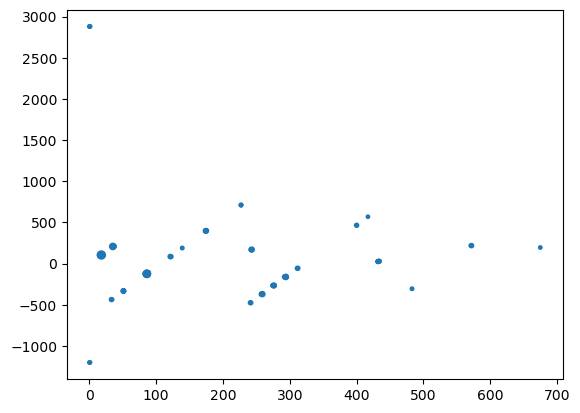

Starting basis: [[ 105 -124]
 [  18   86]]
Starting basis size: 34121
Running basis refinement...
The angle between the basis vectors is: 135.52924129029478
[-124   86] is larger than [105  18]
The updated basis vectors are [-19 104][105  18]
This run resulted in a basis smaller than the last: 22526
The updated basis vectors are: [[-19 105]
 [104  18]]
------------------------------------
Running basis refinement...
The angle between the basis vectors is: 90.62574149252784
[105  18] is larger than [-19 104]
The updated basis vectors are [ 86 122][-19 104]
This run resulted in a basis larger than the last: 33457
Terminating loop.
------------------------------------


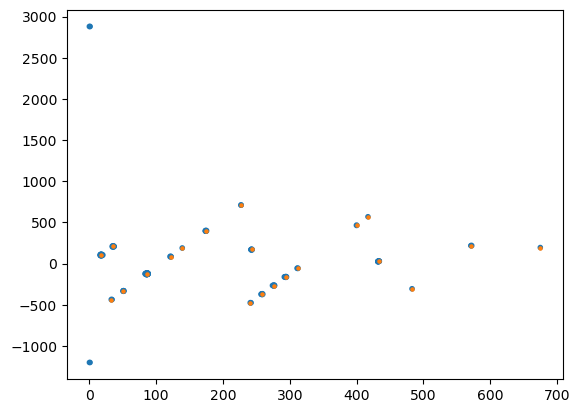

Starting basis: [[-19 105]
 [104  18]]
Refined_basis: [[-19.08353183 104.51754006]
 [103.79130576  17.66825466]]


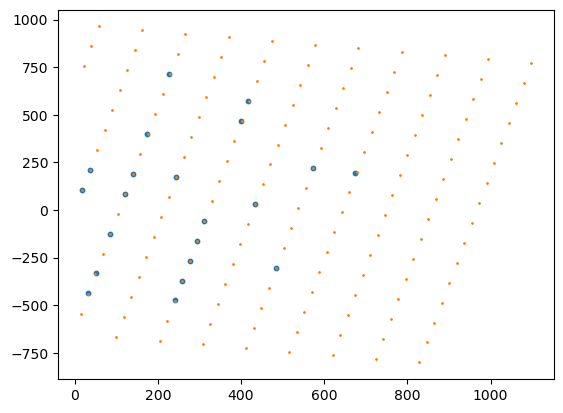

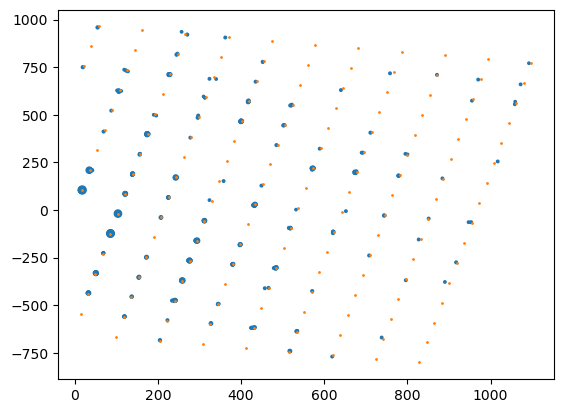

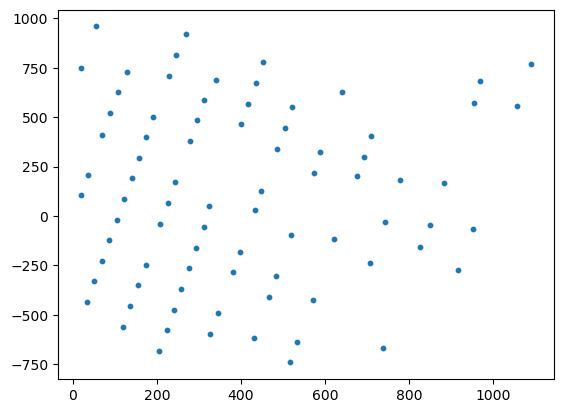

[57.2  56.95] 4.52


In [5]:
combined_nonredundant_lattice, unit_cell_dimensions, highest_resolution = sax.find_lattice(diffraction_indices, 
                                                                                           diffraction_amplitudes, 
                                                                                           log_diff_spectrum,
                                                                                           pixel_size = 1.048,
                                                                                           show_plots=True,
                                                                                           verbose=True, 
                                                                                           num_sd=2, 
                                                                                           miller_index_buffer=2, 
                                                                                           box_radius=10)

print(unit_cell_dimensions, highest_resolution)

In [6]:
mask_indices_array = sax.generate_lattice_mask_indices(combined_nonredundant_lattice)

In [7]:
mask_indices_array.astype(int)

array([[ 748,   18],
       [ 748,   19],
       [ 748,   20],
       ...,
       [ 773, 1092],
       [ 773, 1093],
       [ 773, 1094]])

In [9]:
# Pass these values to replace_diffraction_spots

masked_fft = sax.replace_diffraction_spots(padded_fft, mask_indices_array)

In [ ]:
# From here, calculate a new log_diff_spectrum and rerun pipeline
# If the lattice has more than 5 points...do something. Remove it?